<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_01_pandas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is 

In [ ]:
#Tipo de dato de tiempo en Pandas
#En este ejemplo vamos a crear una serie de tiempo de un mes cada dia cada hora
import pandas as pd
from datetime import datetime
import numpy as np

# range_date
rd = pd.date_range(start ='1/1/2025', end ='1/4/2025', freq ='h')
# print(rd)
# print(type(rd[2]))
# print(len(rd))

In [ ]:
#Creamos un dataframe con una columna aleatoria y el tiempo como indice
df = pd.DataFrame(rd, columns=['datetime'])
df['data'] = np.random.randint(0, 100, size=(len(rd)))
df.set_index('datetime', inplace=True)
df.head()
df.tail()

,data
datetime,
2025-01-03 20:00:00,94
2025-01-03 21:00:00,58
2025-01-03 22:00:00,12
2025-01-03 23:00:00,82
2025-01-04 00:00:00,98


In [ ]:
#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos
filtered_df = df.loc['2025-01-02']
#print(filtered_df)




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


## Solución


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns

1. Leer el dataset desde el github.

In [ ]:
path = os.getcwd()
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(f"{path}")
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


2. Definir como indice la columna time.


In [ ]:
df.set_index('time', inplace=True)
df

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


3. Obtenga información del data frame.



In [ ]:
df.groupby('time')['close'].mean()


,close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 5:00:00,1.09185
2023-05-12 6:00:00,1.09223
2023-05-12 7:00:00,1.09262


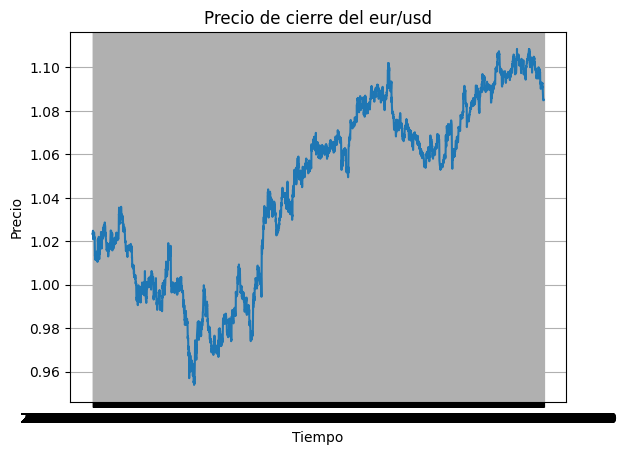

In [ ]:
plt.plot(df.index, df['close'])
plt.title('Precio de cierre del eur/usd')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.grid()
plt.show()

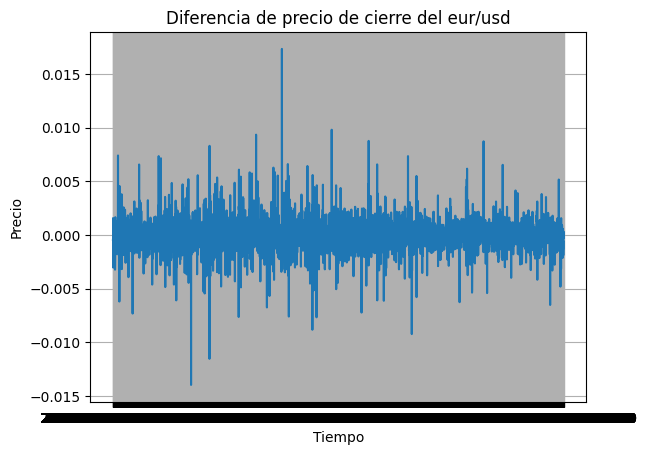

In [ ]:
plt.plot(df.index, df['Diff_Close'])
plt.title('Diferencia de precio de cierre del eur/usd')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.grid()
#plt.show()

4. Determine si hay null, nan en el data frame.


In [ ]:
df[df.index == 'nan']

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


In [ ]:
#df = df.dropna()
#df

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:





- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.


In [ ]:
DiffPrice = df['close'].diff()
df['DiffPrice'] = DiffPrice
DF = df[['close', 'DiffPrice']]
DF = DF.dropna()

In [ ]:
DF

,close,DiffPrice
time,,
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
2022-07-25 18:00:00,1.02099,-0.00082
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


- Para la nueva columna construya un histograma de los datos.


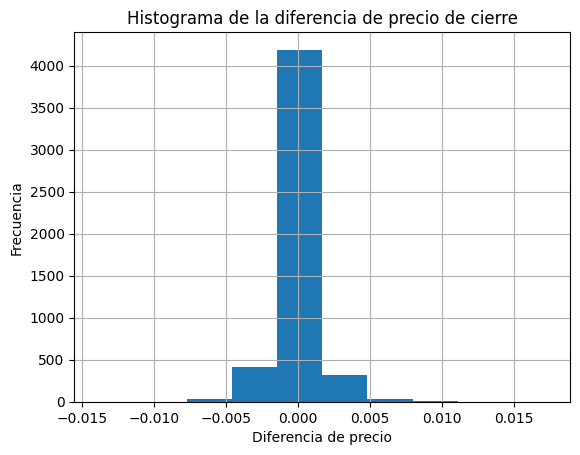

In [ ]:
plt.hist(DF['DiffPrice'])
plt.title('Histograma de la diferencia de precio de cierre')
plt.xlabel('Diferencia de precio')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.

In [ ]:
pip install -q fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.9 MB/s eta 0:00:00


(0.2175830243598641, -0.013969999999999818, 1.8578652682049945)

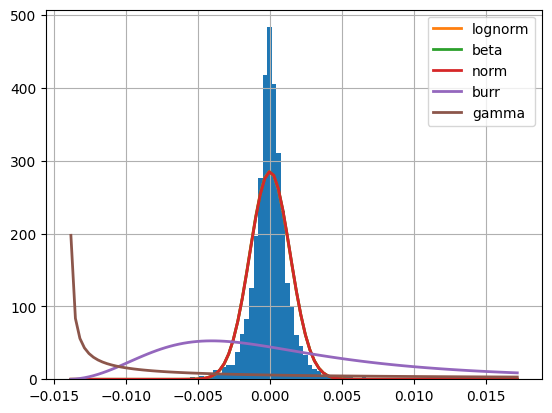

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(DF['DiffPrice'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]
f.fitted_param["gamma"]

7. Para el data frame, seleccionemos solo los datos del 2023.




In [ ]:
df.index = pd.to_datetime(df.index)
df_2023 = df.loc['2023']
df_2023

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-02 00:00:00,2722,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315,-0.00200
2023-01-02 01:00:00,2723,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090,0.00169
2023-01-02 02:00:00,2724,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055,0.00093
2023-01-02 03:00:00,2725,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345,-0.00162
2023-01-02 04:00:00,2726,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895,-0.00016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545,-0.00038
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020,0.00032
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075,-0.00015


8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes
`



In [ ]:
T15D = df_2023.groupby(pd.Grouper(freq='15D')).mean()
T15D

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-02,2853.5,1.069313,1.070248,1.068430,1.069361,3503.856061,10.181818,0.0,1.069337,0.000047,0.000043,0.000045,0.000047
2023-01-17,3117.5,1.085552,1.086401,1.084746,1.085565,3191.670455,8.973485,0.0,1.085558,0.000015,0.000020,0.000017,0.000015
2023-02-01,3381.5,1.077734,1.078544,1.076861,1.077679,3179.253788,8.863636,0.0,1.077707,-0.000066,-0.000069,-0.000068,-0.000066
2023-02-16,3645.5,1.063187,1.063884,1.062480,1.063150,2926.143939,8.833333,0.0,1.063169,-0.000034,-0.000034,-0.000034,-0.000034
2023-03-03,3909.0,1.063175,1.064041,1.062303,1.063186,3618.418251,8.904943,0.0,1.063181,0.000026,0.000023,0.000024,0.000026
2023-03-18,4160.0,1.080871,1.081651,1.080142,1.080936,2913.150628,8.861925,0.0,1.080903,0.000074,0.000077,0.000076,0.000074
2023-04-02,4399.5,1.093027,1.093724,1.092419,1.093090,2085.712500,9.041667,0.0,1.093059,0.000063,0.000063,0.000063,0.000063
2023-04-17,4651.5,1.099085,1.099761,1.098398,1.099084,2277.863636,8.715909,0.0,1.099085,-0.000006,-0.000009,-0.000008,-0.000006
2023-05-02,4891.5,1.098948,1.099641,1.098257,1.098889,2295.592593,8.648148,0.0,1.098918,-0.000059,-0.000056,-0.000057,-0.000059


In [ ]:
T7D = df_2023.groupby(pd.Grouper(freq='7D')).mean()
T7D

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-02,2781.5,1.060026,1.060999,1.059065,1.059972,3606.366667,11.341667,0.0,1.059999,-0.000047,-5.050000e-05,-4.891667e-05,-0.000047
2023-01-09,2901.5,1.075837,1.076790,1.074993,1.076002,3643.375000,9.141667,0.0,1.075920,0.000156,1.559167e-04,1.561250e-04,0.000156
2023-01-16,3021.5,1.082021,1.082941,1.081192,1.082041,3450.716667,9.091667,0.0,1.082031,0.000020,1.983333e-05,1.983333e-05,0.000020
2023-01-23,3141.5,1.088411,1.089192,1.087631,1.088414,2863.625000,8.941667,0.0,1.088412,0.000010,7.333333e-06,8.833333e-06,0.000010
2023-01-30,3261.5,1.089315,1.090211,1.088410,1.089281,3306.150000,8.900000,0.0,1.089298,-0.000062,-5.966667e-05,-6.091667e-05,-0.000062
2023-02-06,3381.5,1.073453,1.074149,1.072609,1.073363,3031.191667,8.933333,0.0,1.073408,-0.000097,-9.600000e-05,-9.658333e-05,-0.000097
2023-02-13,3501.5,1.069640,1.070442,1.068875,1.069648,3023.691667,8.725000,0.0,1.069644,0.000014,1.358333e-05,1.383333e-05,0.000014
2023-02-20,3621.5,1.063495,1.064112,1.062823,1.063374,2775.850000,8.733333,0.0,1.063434,-0.000124,-1.230000e-04,-1.233333e-04,-0.000124
2023-02-27,3741.5,1.060786,1.061533,1.060087,1.060854,2982.016667,9.066667,0.0,1.060820,0.000073,7.291667e-05,7.316667e-05,0.000073


In [ ]:
T1M = df_2023.groupby(pd.Grouper(freq='1M')).mean()
T1M

<ipython-input-24-92b302a17679>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  T1M = df_2023.groupby(pd.Grouper(freq='1M')).mean()


,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-31,2985.5,1.077433,1.078325,1.076588,1.077463,3347.763258,9.577652,0.0,1.077448,0.000031,0.000031,0.000031,0.000031
2023-02-28,3489.5,1.071221,1.071972,1.070433,1.071167,3029.912500,8.825000,0.0,1.071194,-0.000060,-0.000062,-0.000061,-0.000060
2023-03-31,4004.5,1.070837,1.071657,1.070032,1.070874,3282.461818,8.901818,0.0,1.070855,0.000049,0.000049,0.000049,0.000049
2023-04-30,4519.5,1.096012,1.096711,1.095365,1.096051,2208.629167,8.854167,0.0,1.096032,0.000036,0.000036,0.000036,0.000036
2023-05-31,4879.5,1.099051,1.099718,1.098358,1.098980,2240.137500,8.704167,0.0,1.099015,-0.000069,-0.000070,-0.000069,-0.000069


9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:



In [ ]:
df_2023.groupby(pd.Grouper(freq='1M')).mean()
enero = df_2023.loc['2023-01']
febrero = df_2023.loc['2023-02']
marzo = df_2023.loc['2023-03']
abril = df_2023.loc['2023-04']
mayo = df_2023.loc['2023-05']
#junio = df_2023.loc['2023-06']
#julio = df_2023.loc['2023-07']
#agosto = df_2023.loc['2023-08']
#septiembre = df_2023.loc['2023-09']
#octubre = df_2023.loc['2023-10']
#noviembre = df_2023.loc['2023-11']


<ipython-input-49-5c886888a2ce>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_2023.groupby(pd.Grouper(freq='1M')).mean()


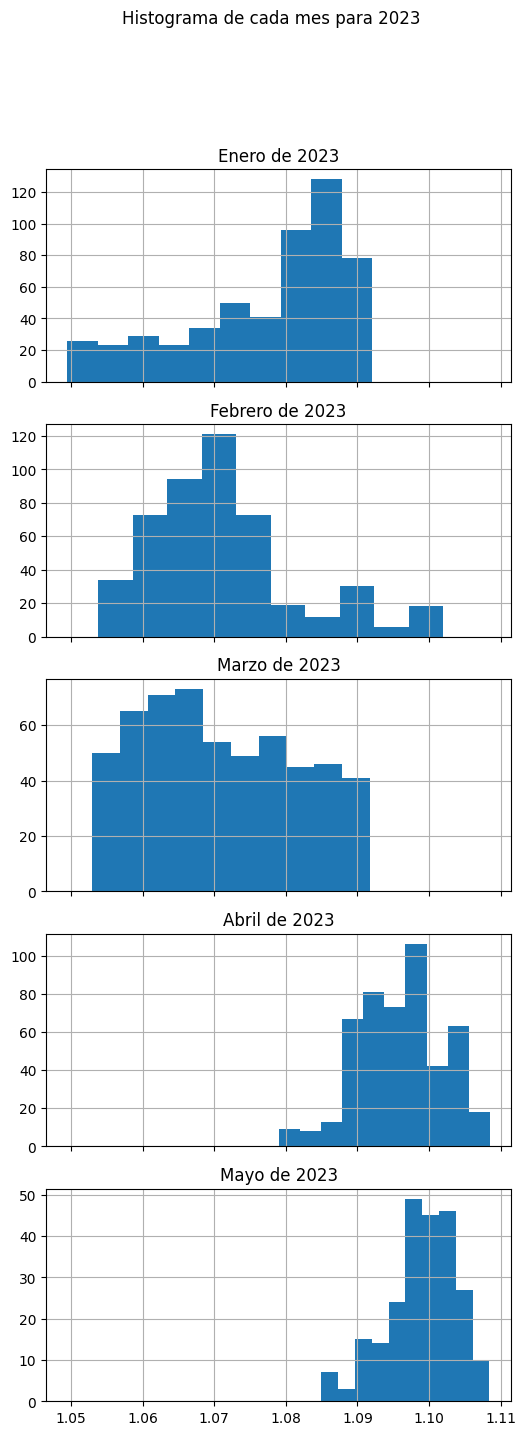

In [ ]:
fig, axs = plt.subplots(5, figsize=(6, 16), sharex=True)
fig.suptitle('Histograma de cada mes para 2023')
axs[0].hist(enero['close'])
axs[0].set_title('Enero de 2023')
axs[0].grid()
axs[1].hist(febrero['close'])
axs[1].set_title('Febrero de 2023')
axs[1].grid()
axs[2].hist(marzo['close'])
axs[2].set_title('Marzo de 2023')
axs[2].grid()
axs[3].hist(abril['close'])
axs[3].set_title('Abril de 2023')
axs[3].grid()
axs[4].hist(mayo['close'])
axs[4].set_title('Mayo de 2023')
axs[4].grid()

In [ ]:
pip install -q ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


1. Leer los datos desde una página web.


In [ ]:
ids = breast_cancer_wisconsin_diagnostic['data']['ids']

In [ ]:
targets = breast_cancer_wisconsin_diagnostic['data']['targets']

In [ ]:
features = breast_cancer_wisconsin_diagnostic['data']['features']

In [ ]:
DFF = features
DFF.head()
DFF['id'] = ids
DFF

<ipython-input-83-483ce10618ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFF['id'] = ids


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,id
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,842302
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,842517
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,84300903
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,84348301
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,84358402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,926424
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,926682
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,926954
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,927241


2. Renombrar las columnas en formato PascalCase.

In [ ]:
def CamelCase(name):
 return name.strip().title().replace("_", "")

In [ ]:
DFF = DFF.rename( mapper=CamelCase, axis="columns")
DFF

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Id
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,842302
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,842517
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,84300903
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,84348301
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,84358402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,926424
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,926682
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,926954
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,927241


3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [ ]:
DFF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [ ]:
DFF.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Id
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,926424
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,926682
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,926954
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,927241
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,92751


In [ ]:
DFF.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Id
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,3.037183e+07
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,1.250206e+08
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,8.670000e+03
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,8.692180e+05
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,9.060240e+05
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,8.813129e+06
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,9.113205e+08


In [ ]:
DFF.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Id
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,842302
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,842517
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,84300903
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,84348301
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,84358402


4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?


No

## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:





5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

In [ ]:
targets["Diagnosis"].unique()


array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```



<Axes: xlabel='Diagnosis', ylabel='count'>

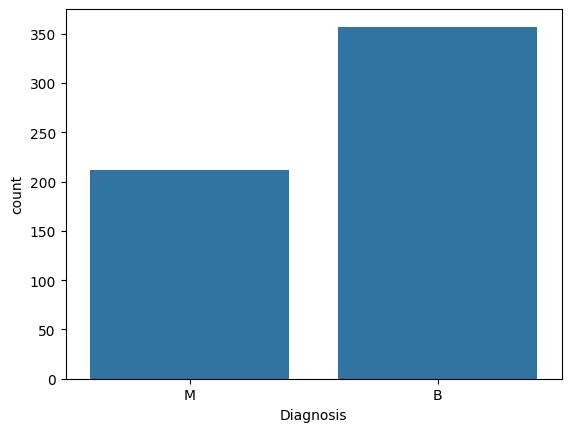

In [ ]:
import seaborn as sns
sns.countplot(x="Diagnosis", data=targets)

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


In [ ]:
DFF['DiagnosisNumeric'] = targets['Diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
DFF

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Id,DiagnosisNumeric
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,842302,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,842517,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,84300903,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,84348301,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,84358402,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,926424,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,926682,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,926954,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,927241,1


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`


In [ ]:
abs((DFF - DFF.mean())/DFF.std())

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Id,DiagnosisNumeric
0,1.096100,2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0.236197,1.296535
1,1.828212,0.353322,1.684473,1.907030,0.826235,0.486643,0.023825,0.547662,0.001391,0.867889,...,1.533776,1.888827,0.375282,0.430066,0.146620,1.086129,0.243675,0.280943,0.236196,1.296535
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,0.397658,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0.431362,1.296535
3,0.768233,0.253509,0.592166,0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.249720,0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0.431741,1.296535
4,1.748758,1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,0.009552,0.561956,...,1.337363,1.219651,0.220362,0.313119,0.612640,0.728618,0.867590,0.396751,0.431821,1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,0.312314,0.930209,...,1.751022,2.013529,0.378033,0.273077,0.663928,1.627719,1.358963,0.708467,0.235524,1.296535
565,1.703356,2.083301,1.614511,1.722326,0.102368,0.017817,0.692434,1.262558,0.217473,1.057681,...,1.420690,1.493644,0.690623,0.394473,0.236365,0.733182,0.531387,0.973122,0.235522,1.296535
566,0.701667,2.043775,0.672084,0.577445,0.839745,0.038646,0.046547,0.105684,0.808406,0.894800,...,0.578492,0.427529,0.808876,0.350427,0.326479,0.413705,1.103578,0.318129,0.235520,1.296535
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,0.235518,1.296535


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [ ]:
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

['RadiusMean',
 'TextureMean',
 'PerimeterMean',
 'AreaMean',
 'SmoothnessMean',
 'CompactnessMean',
 'ConcavityMean',
 'ConcavePointsMean',
 'SymmetryMean',
 'FractalDimensionMean']

In [ ]:
Radius = DFF.filter(regex='^Radius')
Radius.mean()
Radius['DiagnosisNumeric'] = DFF['DiagnosisNumeric']


<ipython-input-146-3d2c21a7143e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Radius['DiagnosisNumeric'] = DFF['DiagnosisNumeric']


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.


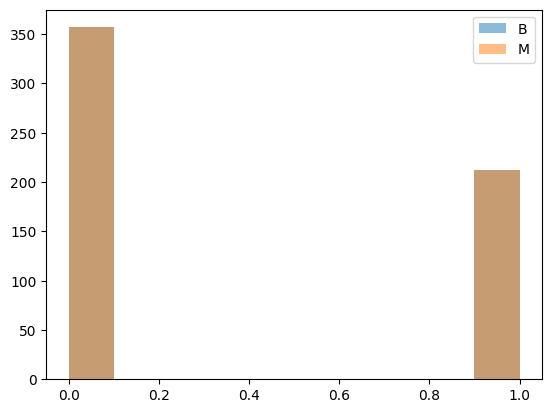

In [ ]:
plt.hist(Radius['DiagnosisNumeric'], alpha=0.5, label='B')
plt.hist(Radius['DiagnosisNumeric'], alpha=0.5, label='M')
plt.legend(loc='upper right')



11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```



In [ ]:
means_df.DiagnosisNumeric = target
means_df.rename(columns={'DiagnosisNumeric': 'Diagnosis'}, inplace=True)
means_df.head()

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,M,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,M,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,M,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,M,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,M,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908


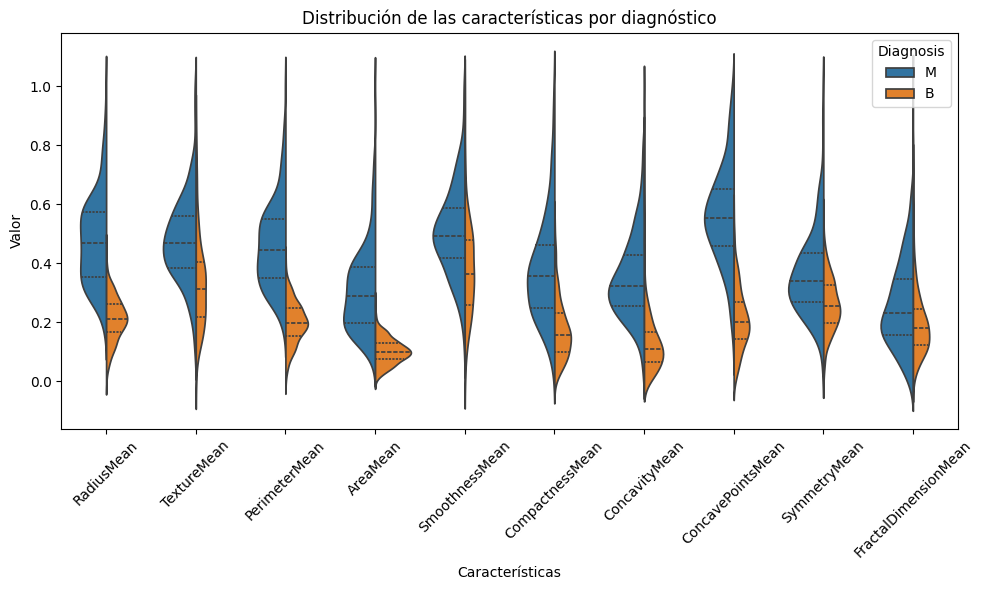

In [ ]:
means_df_norm = means_df.copy()

# Normalizamos los datos
for col in means_df.columns[1:]:
    min_val = means_df[col].min()
    max_val = means_df[col].max()
    means_df_norm[col] = (means_df[col] - min_val)/(max_val - min_val)

# melt -> Transforma el DataFrame de tal forma que todas las columnas de características seleccionadas se "aplanan" en tres columnas nuevas: {DiagnosisNumeric, features, value}
df_melted = pd.melt(means_df_norm, id_vars="Diagnosis", var_name="features", value_name="value")

fig = plt.figure(figsize=(10, 6))

# hue -> Utiliza la columna Diagnosis para diferenciar las distribuciones por categorías
# split=True -> Permite que ambos grupos aparezcan en el mismo gráfico de violín
# inner="quart" -> Añade líneas de cuartiles dentro de los gráficos de violín (distribución del 25%, 50% y 75% de los datos)
sns.violinplot(x="features", y="value", hue="Diagnosis", data=df_melted, split=True, inner="quart")

plt.title('Distribución de las características por diagnóstico')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.xticks(rotation=45)
fig.tight_layout()

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```


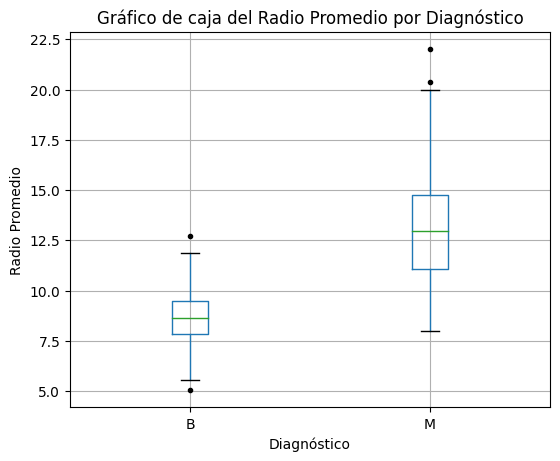

In [ ]:
""" ===================== Valores atípicos para RadiusMean ===================== """

means_df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(6,5))

plt.title('Gráfico de caja del Radio Promedio por Diagnóstico')
plt.suptitle('')
plt.xlabel('Diagnóstico')
plt.ylabel('Radio Promedio')
plt.show()

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

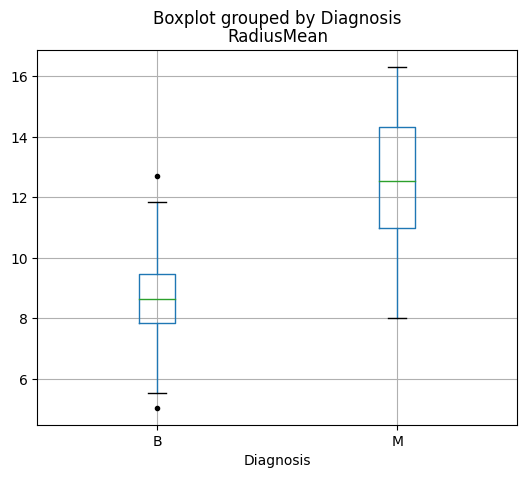

In [ ]:
# Definimos los outliers a partir del intercuartílico
Q1 = means_df['RadiusMean'].quantile(0.25)
Q3 = means_df['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1   # Rango intercuartílico

# Eliminamos los valores atípicos
means_df2 = means_df[~((means_df['RadiusMean'] < ( Q1-1.5*IQR )) | (means_df['RadiusMean'] > (Q3+1.5*IQR)))]
# '|' es un operador que se utiliza para combinar dos condiciones.

means_df2.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(6,5))

13. Encontrar la matriz de correlación, emplear el método corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [ ]:
means_df.columns

Index(['Diagnosis', 'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
       'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean'],
      dtype='object')

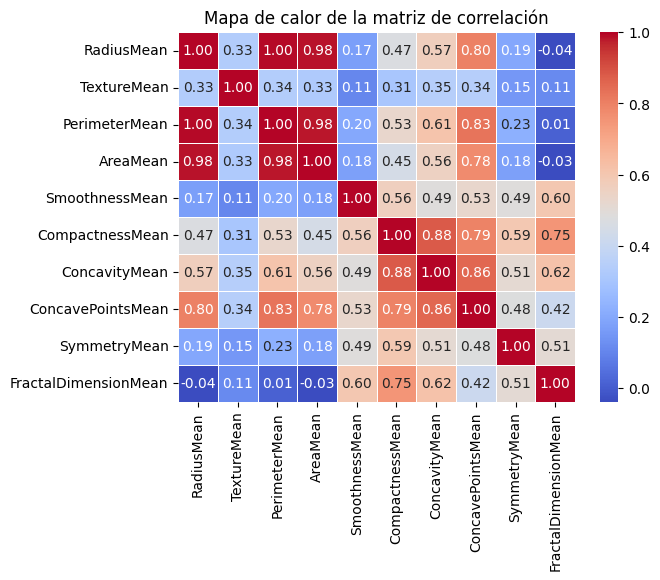

In [ ]:
# ==================== Matriz de correlación ====================
Mcor = means_df.iloc[:, 1:11].corr()

# Generamos un heatmap con seaborn para la matriz de correlación
plt.figure()
sns.heatmap(Mcor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

**Observaciones:**

* Vemos que algunas características geométricas como el perímetro, el área y el radio tienen una correlación bastante alta. Esto se esperaba gracias a sus relaciones matemáticas.

  Así mismo, el perímetro, el área, la compactibilidad y la concavidad también son relaciones geométricas que se correlacionan altamente en los datos.

* Por otro lado, vemos que la dimensión fractal guarda una correlación media de un 50% con características como la simetría, la concavidad, la compactibilidad y la suavidad de las células.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

\
> * Gráficos de dispersión para observar la correlación entre dos características.
>
> * Gráficos de distribución (barras o de densidad) para una sola variable continua para entender su tipo de distribución, la simetría, la kurtosis, el sesgo, entre otros.
>
> * Gráficos de enjambre que permiten mostrar la dispersión de los datos sin superponer puntos. Este sería útil para mostrar cómo los puntos individuales se distribuyen entre las características.

Hint:


```python
df['time'] =  pd.to_datetime(df.time)
df.set_index("time", inplace=True)
df = df.drop(columns = ["Unnamed: 0"])
df["DiffClose"] = df.close.diff()
df2 = df[["DiffClose", "close"]][1:]
df2.DiffClose.hist(bins=1000)


!pip install fitter


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()a
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]



df2.groupby(pd.Grouper(freq='15D')).mean()
```